In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cv2
import mediapipe as mp


In [5]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [6]:
def landmarks_to_features(hand_landmarks):
    """Generate a feature vector from hand landmarks.

    Args:
        hand_landmarks (HandLandmark): The hand landmarks.

    Returns:
        np.ndarray: The feature vector of size (42,).
    """
    coords = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])
    
    return coords.flatten()  # shape (42,)

def preprocess_image(image_path):
    """Preprocess the image for hand tracking and return landmark features."""
    # Load and convert image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    features_list = []

    with mp_hands.Hands(
        static_image_mode=True,
        max_num_hands=2,
        min_detection_confidence=0.5
    ) as hands:
        results = hands.process(image_rgb)

        if not results.multi_hand_landmarks:
            return features_list  # no hands detected

        for hand_landmarks in results.multi_hand_landmarks:
            # Convert landmarks to features
            features = landmarks_to_features(hand_landmarks)
            features_list.append(features)

            # Optional: Draw landmarks for visualization
            # annotated_image = image.copy()
            # mp_drawing.draw_landmarks(
            #     annotated_image,
            #     hand_landmarks,
            #     mp_hands.HAND_CONNECTIONS,
            #     mp_drawing_styles.get_default_hand_landmarks_style(),
            #     mp_drawing_styles.get_default_hand_connections_style()
            # )
            # You can save the annotated image if you want
            # cv2.imwrite('./annotated_image.png', annotated_image)

    return features_list

In [7]:
LABELS = [
    '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 
    'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
    'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'
]

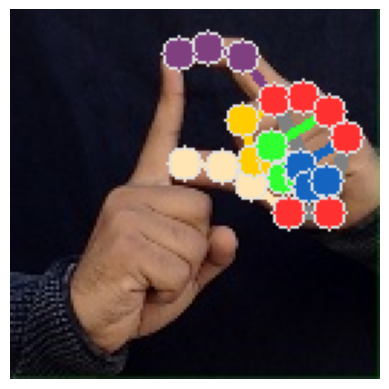

(array([0.46486783, 0.88021755, 0.37187046, 0.80111384, 0.35721913,
        0.67185575, 0.462136  , 0.57673252, 0.56006199, 0.50906169,
        0.37027201, 0.46118167, 0.33700991, 0.28387481, 0.32101363,
        0.17080979, 0.31077239, 0.07967344, 0.47656837, 0.46477094,
        0.51491487, 0.26987597, 0.53264832, 0.15295632, 0.54895246,
        0.05558944, 0.5579527 , 0.52041709, 0.61429369, 0.40176585,
        0.5654434 , 0.48015636, 0.52909404, 0.54431927, 0.61991626,
        0.60288501, 0.63744015, 0.52059597, 0.58359581, 0.5742594 ,
        0.54141128, 0.62858528]),
 (42,))

In [8]:
feature = preprocess_image("archive/data/2/0.jpg")[0]

img = cv2.imread("annotated_image.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

feature, feature.shape

In [12]:
all_features = []

for label in LABELS:
    print(f"Processing label: {label}")
    for i in range(1000):
        try:
            features_list = preprocess_image(f"archive/data/{label}/{i}.jpg")
            if not features_list:
                continue  # no hands detected
            feature = features_list[0]  # take the first hand
            # Append feature vector + label
            all_features.append(np.append(feature, label))
        except Exception as e:
            # Skip missing files or errors
            continue

# Create DataFrame
columns = [f"f{j}" for j in range(42)] + ["label"]
features_df = pd.DataFrame(all_features, columns=columns)
features_df.to_csv("hand_landmarks_features.csv", index=False)

features_df.head()

Processing label: 1


KeyboardInterrupt: 